In [102]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import os
import cv2
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten,GlobalAveragePooling2D
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [103]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [104]:
# Define the paths to your image and csv folders
train_val_dir = "/content/drive/MyDrive/Colab Notebooks/Machine Learning Assignment/charts/train_val"
test_dir = "/content/drive/MyDrive/Colab Notebooks/Machine Learning Assignment/charts/test"
train_path_labels = "/content/drive/MyDrive/Colab Notebooks/Machine Learning Assignment/charts/train_val.csv"
train_val_labels = pd.read_csv(train_path_labels)

In [105]:
# load training dataset in numpy array
images = []
labels = []
for filename in os.listdir(train_val_dir):
 if filename.endswith('.png'):
 # Load the images and resize them to (64, 64) with 3 color channels
  image = cv2.imread(os.path.join(train_val_dir, filename))
  image = cv2.resize(image, (64, 64))
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# image = Image.open(os.path.join(train_val_dir, filename))
  image_array = np.array(image)
 # Append the array to the list of images
  images.append(image_array)
  labels.append(filename)

# Convert the string labels to numerical labels
le = LabelEncoder()
labels = le.fit_transform(labels)
# Convert the lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)
# Save the arrays in NumPy format
np.save('x_train.npy', images)
np.save('y_train.npy', labels)
x_train = np.load('x_train.npy')
y_train = np.load('y_train.npy')

In [106]:
x_train.shape

(1000, 64, 64, 3)

In [107]:
x_train[:5]
y_train[:5]

array([512, 301, 190, 268, 690])

In [108]:
# load test dataset in numpy array
images = []
labels = []
for filename in os.listdir(test_dir):
 if filename.endswith('.png'):
 # Load the images and resize them to (64, 64) with 3 color channels
  image = cv2.imread(os.path.join(test_dir, filename))
  image = cv2.resize(image, (64, 64))
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# image = Image.open(os.path.join(test_dir, filename))
  image_array = np.array(image)
 # Append the array to the list of images
  images.append(image_array)
  labels.append(filename)
# Convert the string labels to numerical labels
le = LabelEncoder()
labels = le.fit_transform(labels)


In [109]:
images = np.array(images)
labels = np.array(labels)
# Save the arrays in NumPy format
np.save('x_test.npy', images)
np.save('y_test.npy', labels)
x_test = np.load('x_test.npy')
y_test = np.load('y_test.npy')

In [110]:
x_test.shape

(50, 64, 64, 3)

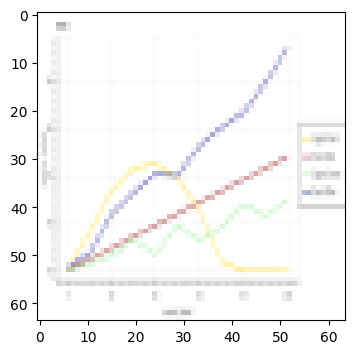

In [111]:
# check the images loaded
plt.figure(figsize = (12,4))
plt.imshow(x_train[10])
plt.imshow(x_train[208])
plt.imshow(x_train[444])

In [112]:
# define some classes from the images we have observed
image_classes = ['line', 'dot_line', 'hbar_categorical', 'vbar_categorical', 'pie']
image_classes[0]
# map the categories to the labels array i.e y_train
label_map = {'line': 0, 'dot_line': 1, 'hbar_categorical': 2, 'vbar_categorical': 3, 'pie': 4}
y_train = np.array([label_map[label] for label in train_val_labels['type']])

In [113]:
y_train
y_train.shape
y_test.shape

(50,)

In [114]:
# we need to map the lables from csv to the images somehow
# function to test the chart sample
def image_sample(x, y, index):
 plt.figure(figsize = (12,4))
 plt.imshow(x[index])
# image_label = train_val_labels.iloc[index]['type']
# plt.xlabel(image_label)
 plt.xlabel(image_classes[y[index]])

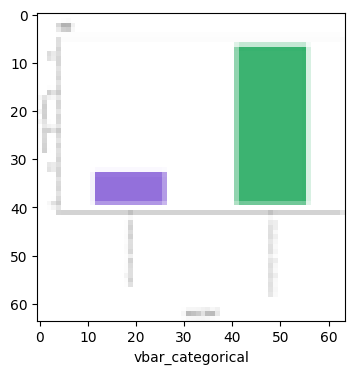

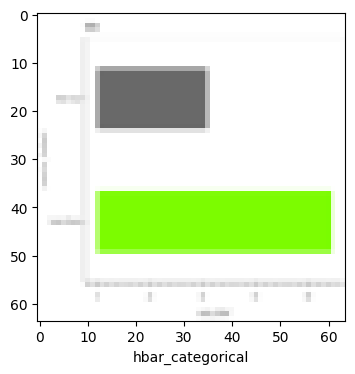

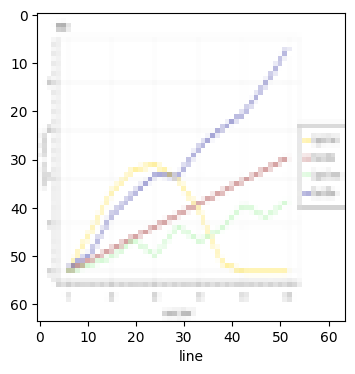

In [115]:
image_sample(x_train,y_train,0)
image_sample(x_train,y_train,208)
image_sample(x_train,y_train,444)

In [116]:
# now we have mapped the corresponding labels to the image

In [117]:
# normalize the image
# x_train[0]/255
x_train=x_train /255
x_test=x_train /255

In [118]:

x_test.shape

(1000, 64, 64, 3)

In [119]:
# take the label for train data from csv file
y_train_index = train_val_labels['image_index']
y_train_type = train_val_labels['type']

In [120]:
y_train_type[:5]

0    vbar_categorical
1    vbar_categorical
2    vbar_categorical
3    vbar_categorical
4    vbar_categorical
Name: type, dtype: object

In [121]:
# writing a simple nn to test first
# Define the output architecture
output = Sequential([
 Flatten(input_shape=(64,64,3)),
 Dense(3000, activation='relu'),
 Dense(1000, activation='relu'),
 Dense(5, activation='softmax')
])
# Compile the output
output.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
output.fit(x_train,y_train,epochs=10)

Epoch 1/10
32/32 [==============================] - 12s 345ms/step - loss: 3.1025 - accuracy: 0.2350
Epoch 2/10
32/32 [==============================] - 8s 253ms/step - loss: 1.5395 - accuracy: 0.2960
Epoch 3/10
32/32 [==============================] - 9s 291ms/step - loss: 1.4625 - accuracy: 0.3470
Epoch 4/10
32/32 [==============================] - 10s 306ms/step - loss: 1.4759 - accuracy: 0.3850
Epoch 5/10
32/32 [==============================] - 8s 244ms/step - loss: 1.4373 - accuracy: 0.4050
Epoch 6/10
32/32 [==============================] - 10s 306ms/step - loss: 1.3644 - accuracy: 0.4670
Epoch 7/10
32/32 [==============================] - 9s 272ms/step - loss: 1.3652 - accuracy: 0.4590
Epoch 8/10
32/32 [==============================] - 9s 272ms/step - loss: 1.2782 - accuracy: 0.4900
Epoch 9/10
32/32 [==============================] - 10s 306ms/step - loss: 1.2566 - accuracy: 0.5060
Epoch 10/10
32/32 [==============================] - 8s 244ms/step - loss: 1.2363 - accuracy: 0.

In [123]:
# Split the training images and labels into training and validation sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [124]:
output.evaluate(x_test,y_test)


7/7 [==============================] - 1s 73ms/step - loss: 1.1652 - accuracy: 0.4950


[1.1651936769485474, 0.4950000047683716]

In [125]:
y_pred = output.predict(x_test)
y_pred
y_pred_classes = [np.argmax(ele) for ele in y_pred]
# print("classificaton report : \n",classification_report(y_test,y_pred_classes))

7/7 [==============================] - 1s 77ms/step


In [126]:
# here we see the accuracy is very low and we need to modify our nn to add more layers for better accuracy

In [127]:
# Print the shapes of the arrays to verify that they loaded correctly
print("Train Images Shape:", x_train.shape)
print("Train Labels Shape:", y_train.shape)
print("Test Images Shape:", x_test.shape)
print("Test Labels Shape:", y_test.shape)

Train Images Shape: (800, 64, 64, 3)
Train Labels Shape: (800,)
Test Images Shape: (200, 64, 64, 3)
Test Labels Shape: (200,)


Epoch 1/50
1/1 [==============================] - 6s 6s/step - loss: 1.6222 - accuracy: 0.2188 - val_loss: 1.5872 - val_accuracy: 0.2400
Epoch 2/50
1/1 [==============================] - 4s 4s/step - loss: 1.6057 - accuracy: 0.1900 - val_loss: 1.5752 - val_accuracy: 0.4050
Epoch 3/50
1/1 [==============================] - 3s 3s/step - loss: 1.5796 - accuracy: 0.3938 - val_loss: 1.5577 - val_accuracy: 0.1650
Epoch 4/50
1/1 [==============================] - 3s 3s/step - loss: 1.5533 - accuracy: 0.2087 - val_loss: 1.5284 - val_accuracy: 0.1700
Epoch 5/50
1/1 [==============================] - 3s 3s/step - loss: 1.5246 - accuracy: 0.2400 - val_loss: 1.4789 - val_accuracy: 0.5550
Epoch 6/50
1/1 [==============================] - 5s 5s/step - loss: 1.4806 - accuracy: 0.5512 - val_loss: 1.4060 - val_accuracy: 0.6100
Epoch 7/50
1/1 [==============================] - 3s 3s/step - loss: 1.4139 - accuracy: 0.6125 - val_loss: 1.3342 - val_accuracy: 0.5950
Epoch 8/50
1/1 [=========================

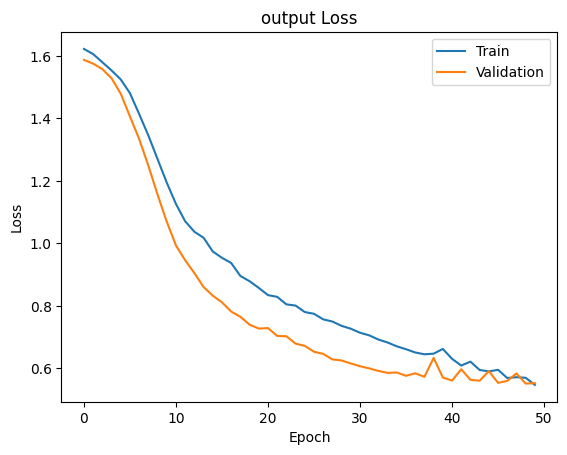

In [130]:
# modify the output architecture to cmnn
cnn_model = Sequential([
 Conv2D(filters=16 ,kernel_size=(3,3), activation='relu', input_shape=(64,64,3)),
 MaxPooling2D(pool_size=(2,2)),
 Conv2D(32, (3,3), activation='relu'),
 MaxPooling2D(pool_size=(2,2)),
 Conv2D(64, (3,3), activation='relu'),
 MaxPooling2D(pool_size=(2,2)),
 Flatten(),
 Dense(128, activation='relu'),
 Dense(5, activation='softmax')
])
# Compile the output
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Train the output
history = cnn_model.fit(x_train, y_train, batch_size=1000, epochs=50,validation_data=(x_test, y_test))
# Plot the obtained loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('output Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [131]:
cnn_model.evaluate(x_test,y_test)

7/7 [==============================] - 0s 30ms/step - loss: 0.5529 - accuracy: 0.8350


[0.5528629422187805, 0.8349999785423279]

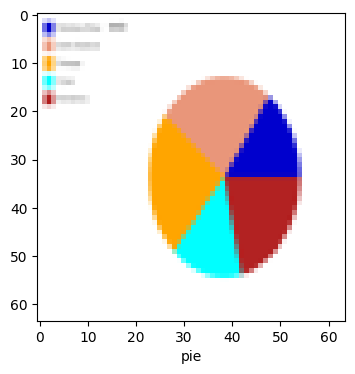

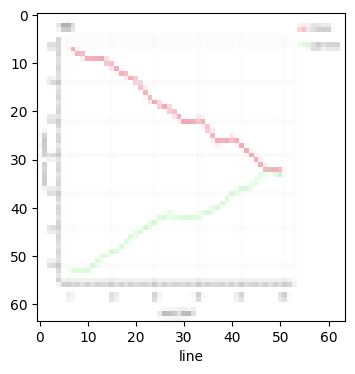

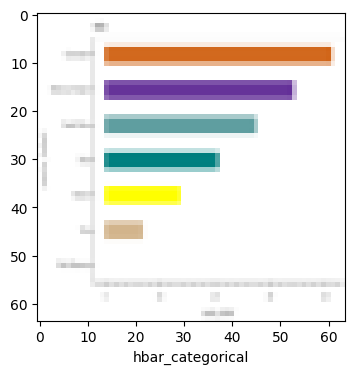

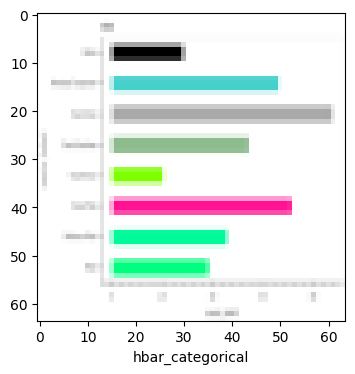

In [132]:
image_sample(x_test,y_test,1)
image_sample(x_test,y_test,50)
image_sample(x_test,y_test,25)
image_sample(x_test,y_test,30)

In [134]:
y_pred = cnn_model.predict(x_test)
y_pred[:5]

7/7 [==============================] - 0s 28ms/step


array([[5.7013416e-01, 2.7091792e-01, 5.9270367e-02, 7.8505445e-03,
        9.1827102e-02],
       [1.5433256e-02, 3.5527077e-02, 1.2758028e-03, 1.6999196e-05,
        9.4774681e-01],
       [1.5859516e-01, 3.7579149e-01, 3.0321516e-03, 9.0513949e-04,
        4.6167600e-01],
       [7.9544529e-02, 8.3637573e-02, 1.9400463e-02, 4.2427241e-04,
        8.1699312e-01],
       [4.7326970e-01, 7.8930043e-02, 2.4581839e-01, 9.4972132e-03,
        1.9248462e-01]], dtype=float32)

In [135]:

y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[0, 4, 4, 4, 0]

In [136]:
y_test[:5]


array([0, 4, 4, 4, 0])

In [137]:
# here we see some values are not matching

'dot_line'

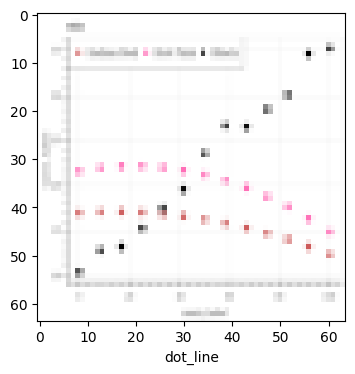

In [138]:
# test actual and predicted
# image_sample(x_test,y_test,1) #actual
# image_classes[y_classes[1]] #predicted
# image_sample(x_test,y_test,10) #actual
# image_classes[y_classes[10]] #predicted
image_sample(x_test,y_test,15) #actual
image_classes[y_classes[15]] #predicted

In [139]:

# some values are not matching

In [140]:

print("classification report: \n", classification_report(y_test,y_classes))


classification report: 
               precision    recall  f1-score   support

           0       0.73      0.73      0.73        37
           1       0.71      0.73      0.72        44
           2       0.96      0.98      0.97        48
           3       1.00      0.94      0.97        33
           4       0.79      0.79      0.79        38

    accuracy                           0.83       200
   macro avg       0.84      0.83      0.84       200
weighted avg       0.84      0.83      0.84       200



In [141]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_classes)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[27  6  1  0  3]
 [ 7 32  0  0  5]
 [ 1  0 47  0  0]
 [ 0  1  1 31  0]
 [ 2  6  0  0 30]]


Text(95.72222222222221, 0.5, 'Actual')

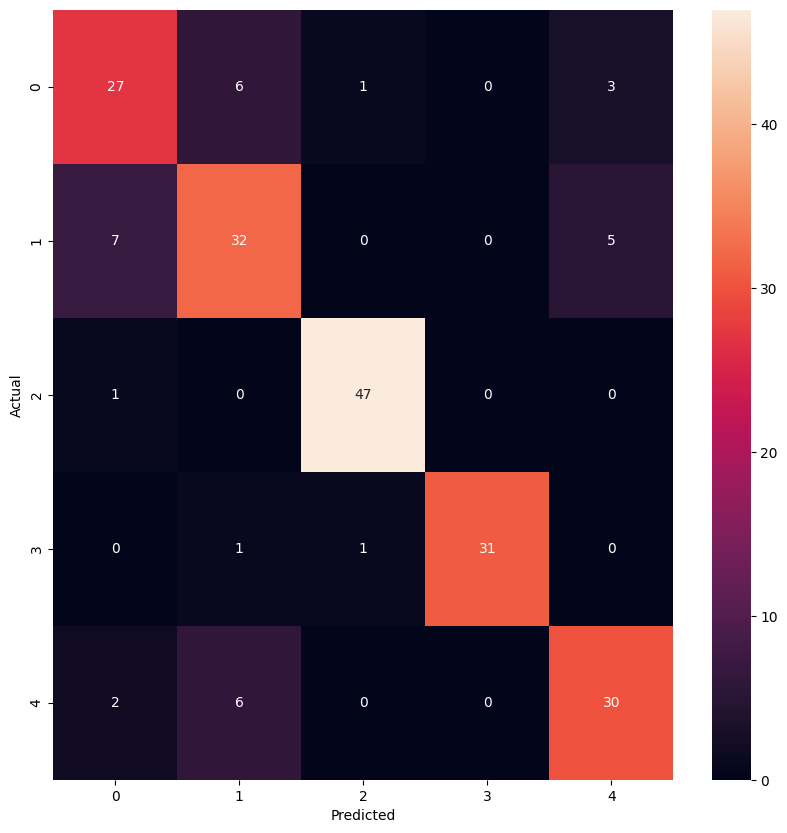

In [142]:
# Plot the confusion matrix
import seaborn as sn
plt.figure(figsize = (10,10))
sn.heatmap(conf_matrix,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')


In [143]:
# for 50 iterations, we can see some promising accuracy, more training will be required for better accuracy
# in the confusion matrix, whatever is not in diagonal is a error

In [144]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Load the pre-trained output
vgg16_output = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

58889256/58889256 [==============================] - 0s 0us/step


In [147]:
# Replace the final classification layer with a new layer
x = vgg16_output.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
prediction = Dense(5, activation='softmax')(x)
pt_output = tf.keras.Model(inputs=vgg16_output.input, outputs=prediction)

In [148]:
# Freeze the weights of all layers except the new classification layer
for layer in pt_output.layers:
 layer.trainable = False


In [149]:
# Compile the output with categorical crossentropy loss and Adam optimizer
pt_output.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [150]:
# Print the summary of the output architecture
pt_output.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [151]:
# Set up data generators for image augmentation and feeding data to the output
train_datagenerator = ImageDataGenerator(
 rescale=1./255,
 rotation_range=20,
 width_shift_range=0.2,
 height_shift_range=0.2,
 shear_range=0.2,
 zoom_range=0.2,
 horizontal_flip=True,
 fill_mode='nearest')
test_datagenerator = ImageDataGenerator(rescale=1./255)

In [152]:

# flow method generates batches of augmented data
train_generator = train_datagenerator.flow(x_train, y_train, batch_size=32)
test_generator = train_datagenerator.flow(x_test, y_test, batch_size=32)

In [156]:
# Train the output with early stopping

from tensorflow.keras.layers import Dense
output_layer = Dense(5, activation='softmax')
from tensorflow.keras.callbacks import EarlyStopping

